In [32]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [33]:
# Charger le dataset
df = pd.read_csv('GrinnellHouses.csv')

# Aperçu du dataset
print(df.head())


   rownames   Date                  Address  Bedrooms  Baths  SquareFeet  \
0         1  16695     1510 First Ave #112          2    1.0      1120.0   
1         2  16880          1020 Center St          3    1.0      1224.0   
2         3  16875       918 Chatterton St          4    1.0      1540.0   
3         4  16833  1023 & 1025 Spring St.          3    1.0      1154.0   
4         5  16667             503 2nd Ave          3    1.0      1277.0   

    LotSize  YearBuilt  YearSold  MonthSold  DaySold  CostPerSqFt  OrigPrice  \
0       NaN       1993      2005          9       16         6.25      17000   
1  0.172176       1900      2006          3       20        22.06      35000   
2       NaN       1970      2006          3       15        18.18      54000   
3       NaN       1900      2006          2        1        26.00      65000   
4  0.206612       1900      2005          8       19        24.08      35000   

   ListPrice  SalePrice  SPLPPct  
0      10500       7000    

In [34]:
print(df.describe())


         rownames          Date    Bedrooms       Baths   SquareFeet  \
count  929.000000    929.000000  929.000000  929.000000   911.000000   
mean   465.000000  18223.215285    3.194833    1.779333  1583.215148   
std    268.323499   1139.171002    0.943293    0.743154   655.664966   
min      1.000000  16527.000000    0.000000    0.000000   640.000000   
25%    233.000000  17169.000000    3.000000    1.000000  1150.000000   
50%    465.000000  18046.000000    3.000000    1.750000  1440.000000   
75%    697.000000  19281.000000    4.000000    2.000000  1833.000000   
max    929.000000  20186.000000    8.000000    6.000000  6815.000000   

          LotSize    YearBuilt     YearSold   MonthSold     DaySold  \
count  741.000000   929.000000   929.000000  929.000000  929.000000   
mean     0.723463  1945.903122  2009.365985    6.831001   16.226050   
std      2.725697    37.209902     3.124149    3.035790    9.396815   
min      0.028926  1870.000000  2005.000000    1.000000    1.000000

Prétraitement des données

In [35]:
# Suppression des colonnes : rownames,Date et address
df.drop(['rownames','Date','Address'], axis=1, inplace=True)

# Aperçu du dataset
print(df.head())

   Bedrooms  Baths  SquareFeet   LotSize  YearBuilt  YearSold  MonthSold  \
0         2    1.0      1120.0       NaN       1993      2005          9   
1         3    1.0      1224.0  0.172176       1900      2006          3   
2         4    1.0      1540.0       NaN       1970      2006          3   
3         3    1.0      1154.0       NaN       1900      2006          2   
4         3    1.0      1277.0  0.206612       1900      2005          8   

   DaySold  CostPerSqFt  OrigPrice  ListPrice  SalePrice  SPLPPct  
0       16         6.25      17000      10500       7000    66.67  
1       20        22.06      35000      35000      27000    77.14  
2       15        18.18      54000      47000      28000    59.57  
3        1        26.00      65000      49000      30000    61.22  
4       19        24.08      35000      35000      30750    87.86  


In [36]:
df = df.dropna()  # Supprime les lignes avec des valeurs manquantes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 732 entries, 1 to 928
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bedrooms     732 non-null    int64  
 1   Baths        732 non-null    float64
 2   SquareFeet   732 non-null    float64
 3   LotSize      732 non-null    float64
 4   YearBuilt    732 non-null    int64  
 5   YearSold     732 non-null    int64  
 6   MonthSold    732 non-null    int64  
 7   DaySold      732 non-null    int64  
 8   CostPerSqFt  732 non-null    float64
 9   OrigPrice    732 non-null    int64  
 10  ListPrice    732 non-null    int64  
 11  SalePrice    732 non-null    int64  
 12  SPLPPct      732 non-null    float64
dtypes: float64(5), int64(8)
memory usage: 80.1 KB
None


Analyse en Composantes Prinicipales ACP

In [37]:
#transforamtion des variables d'année en une variable d'age qui sera utile pour l'acp contrairement au années
df['HouseAge'] = df['YearSold'] - df['YearBuilt']
# suppression des colonnes d'annéees, mois et jours
df.drop(['DaySold','MonthSold','YearSold','YearBuilt'], axis=1, inplace=True)
print(df.head())


   Bedrooms  Baths  SquareFeet   LotSize  CostPerSqFt  OrigPrice  ListPrice  \
1         3    1.0      1224.0  0.172176        22.06      35000      35000   
4         3    1.0      1277.0  0.206612        24.08      35000      35000   
5         3    1.0      1079.0  0.199357        38.92      45900      45900   
8         3    2.0       912.0  0.218000        54.82      59900      52500   
9         3    2.0      1488.0  0.170000        33.60      50000      50000   

   SalePrice  SPLPPct  HouseAge  
1      27000    77.14       106  
4      30750    87.86       105  
5      42000    91.50       105  
8      50000    95.24       105  
9      50000   100.00       105  


In [38]:
#suppression des variables calculables : CostPerSqFt et SPLPPct
df.drop(['SPLPPct','CostPerSqFt'], axis=1, inplace=True)
print(df.head())


   Bedrooms  Baths  SquareFeet   LotSize  OrigPrice  ListPrice  SalePrice  \
1         3    1.0      1224.0  0.172176      35000      35000      27000   
4         3    1.0      1277.0  0.206612      35000      35000      30750   
5         3    1.0      1079.0  0.199357      45900      45900      42000   
8         3    2.0       912.0  0.218000      59900      52500      50000   
9         3    2.0      1488.0  0.170000      50000      50000      50000   

   HouseAge  
1       106  
4       105  
5       105  
8       105  
9       105  


In [39]:
#Centrer et réduire les données
scaler = StandardScaler()
data_scaled = pd.DataFrame(
    scaler.fit_transform(df),  # Standardisation
    columns=df.columns,       # Conserver les noms des colonnes
    index=df.index            # Conserver les index
)
print(data_scaled.head())


   Bedrooms     Baths  SquareFeet   LotSize  OrigPrice  ListPrice  SalePrice  \
1 -0.298074 -1.087697   -0.575706 -0.201905  -1.304922  -1.293324  -1.365161   
4 -0.298074 -1.087697   -0.496733 -0.189337  -1.304922  -1.293324  -1.317835   
5 -0.298074 -1.087697   -0.791761 -0.191985  -1.179640  -1.163548  -1.175857   
8 -0.298074  0.251007   -1.040598 -0.185181  -1.018727  -1.084968  -1.074894   
9 -0.298074  0.251007   -0.182335 -0.202700  -1.132515  -1.114733  -1.074894   

   HouseAge  
1  1.114484  
4  1.087552  
5  1.087552  
8  1.087552  
9  1.087552  


In [40]:
# Initialiser l'ACP (nombre de composantes = toutes les variables)
pca = PCA()

# Appliquer l'ACP sur les données standardisées
pca_result = pca.fit_transform(data_scaled)

# Transformer en DataFrame
pca_df = pd.DataFrame(
    pca_result, 
    columns=[f'PC{i+1}' for i in range(pca_result.shape[1])], 
    index=data_scaled.index
)


In [41]:
# Calculer la matrice de corrélation avant l'ACP
correlation_matrix_before_pca = data_scaled.corr()

# Afficher la matrice de corrélation
print(correlation_matrix_before_pca)

            Bedrooms     Baths  SquareFeet   LotSize  OrigPrice  ListPrice  \
Bedrooms    1.000000  0.507940    0.539860  0.085448   0.424496   0.422669   
Baths       0.507940  1.000000    0.642604  0.223653   0.714438   0.713554   
SquareFeet  0.539860  0.642604    1.000000  0.179112   0.685488   0.670159   
LotSize     0.085448  0.223653    0.179112  1.000000   0.336272   0.344554   
OrigPrice   0.424496  0.714438    0.685488  0.336272   1.000000   0.990785   
ListPrice   0.422669  0.713554    0.670159  0.344554   0.990785   1.000000   
SalePrice   0.419710  0.703064    0.652405  0.317793   0.983973   0.994630   
HouseAge   -0.031904 -0.370146   -0.020277 -0.078667  -0.470028  -0.484441   

            SalePrice  HouseAge  
Bedrooms     0.419710 -0.031904  
Baths        0.703064 -0.370146  
SquareFeet   0.652405 -0.020277  
LotSize      0.317793 -0.078667  
OrigPrice    0.983973 -0.470028  
ListPrice    0.994630 -0.484441  
SalePrice    1.000000 -0.493940  
HouseAge    -0.493940  1.

In [42]:
# Calculer les valeurs propres et les vecteurs propres
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix_before_pca)

# Convertir les valeurs propres en DataFrame
eigenvalues_df = pd.DataFrame(eigenvalues, columns=['Eigenvalue'])

# Classer les valeurs propres par ordre décroissant
eigenvalues_df_sorted = eigenvalues_df.sort_values(by='Eigenvalue', ascending=False).reset_index(drop=True)

# Classer les vecteurs propres par ordre décroissant des valeurs propres
eigenvectors_sorted = eigenvectors[:, eigenvalues_df_sorted.index]

# Convertir les vecteurs propres en DataFrame
eigenvectors_df_sorted = pd.DataFrame(eigenvectors_sorted, columns=correlation_matrix_before_pca.columns)

# Afficher les valeurs propres classées
print("Valeurs propres classées :")
print(eigenvalues_df_sorted)

# Afficher les vecteurs propres classés
print("\nVecteurs propres classés :")
print(eigenvectors_df_sorted)

Valeurs propres classées :
   Eigenvalue
0    4.730131
1    1.180674
2    0.929930
3    0.554937
4    0.364802
5    0.220803
6    0.015109
7    0.003613

Vecteurs propres classés :
   Bedrooms     Baths  SquareFeet   LotSize  OrigPrice  ListPrice  SalePrice  \
0  0.258855  0.540629   -0.153215 -0.691893   0.371949   0.005824  -0.011630   
1  0.380597  0.097564   -0.118907 -0.188642  -0.812096   0.369211   0.006619   
2  0.350902  0.429600    0.005530  0.353283  -0.196283  -0.725715   0.046640   
3  0.168842 -0.143842    0.922015 -0.287081  -0.060238  -0.118839   0.013032   
4  0.443893 -0.103772    0.007332  0.209822   0.210033   0.151299  -0.789449   
5  0.444538 -0.120777    0.010511  0.191305   0.222608   0.175599   0.165219   
6  0.441054 -0.131046   -0.017931  0.191658   0.252050   0.206341   0.589009   
7 -0.217521  0.671138    0.334303  0.401396   0.052918   0.475985   0.004021   

   HouseAge  
0  0.002864  
1 -0.006503  
2 -0.010376  
3 -0.018796  
4 -0.240573  
5  0.802124  


In [43]:
explained_variance = pca.explained_variance_ratio_ * 100  # En pourcentage
cumulative_variance = explained_variance.cumsum()

# Afficher la variance expliquée par composante
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: {var:.2f}% de la variance expliquée, {cum_var:.2f}% cumulée")


PC1: 59.13% de la variance expliquée, 59.13% cumulée
PC2: 14.76% de la variance expliquée, 73.89% cumulée
PC3: 11.62% de la variance expliquée, 85.51% cumulée
PC4: 6.94% de la variance expliquée, 92.45% cumulée
PC5: 4.56% de la variance expliquée, 97.01% cumulée
PC6: 2.76% de la variance expliquée, 99.77% cumulée
PC7: 0.19% de la variance expliquée, 99.95% cumulée
PC8: 0.05% de la variance expliquée, 100.00% cumulée


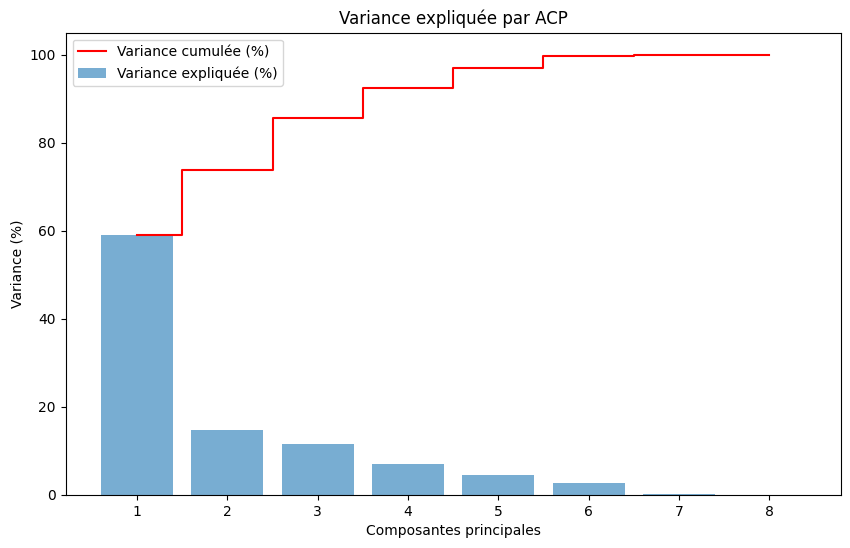

In [44]:
# visualisation de la variance éxpliquée 
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Variance expliquée (%)')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='red', label='Variance cumulée (%)')
plt.xlabel('Composantes principales')
plt.ylabel('Variance (%)')
plt.title('Variance expliquée par ACP')
plt.legend()
plt.show()


In [45]:
# Extraire les trois premières composantes principales
pca_3d = pca_df[['PC1', 'PC2', 'PC3']]


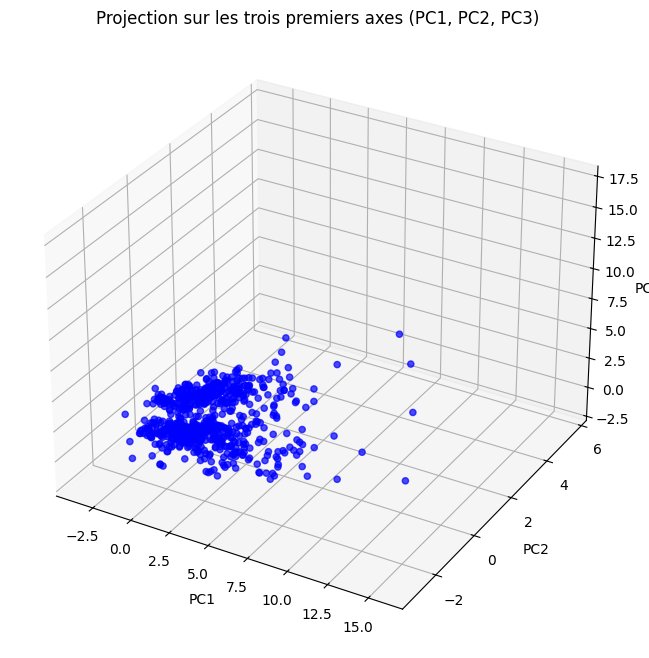

In [46]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracer les points projetés sur PC1, PC2, et PC3
ax.scatter(pca_3d['PC1'], pca_3d['PC2'], pca_3d['PC3'], c='blue', marker='o', alpha=0.7)

# Ajouter des étiquettes aux axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Projection sur les trois premiers axes (PC1, PC2, PC3)')

# Afficher le graphique
plt.show()


Résultats de l'acp à deux axes de projection sur les individus

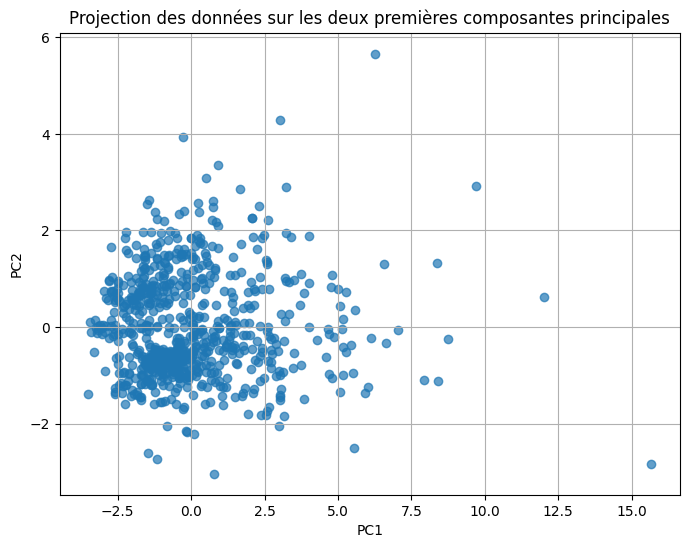

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des données sur les deux premières composantes principales')
plt.grid(True)
plt.show()


In [48]:
# Calculer la qualité des individus par rapport à chaque axe factoriel
quality_individuals_axes = (pca_result**2) / (pca_result**2).sum(axis=1)[:, np.newaxis]

# Créer un DataFrame pour afficher la qualité des individus par axe
quality_individuals_axes_df = pd.DataFrame(
    quality_individuals_axes, 
    columns=[f'Qualité_PC{i+1}' for i in range(pca_result.shape[1])], 
    index=data_scaled.index
)

print("Qualité des individus par axe factoriel:")
print(quality_individuals_axes_df)

Qualité des individus par axe factoriel:
     Qualité_PC1  Qualité_PC2  Qualité_PC3  Qualité_PC4  Qualité_PC5  \
1       0.914518     0.066114     0.015910     0.000595     0.000314   
4       0.907781     0.069910     0.016669     0.000281     0.000255   
5       0.931028     0.044387     0.017626     0.000718     0.005184   
8       0.703073     0.052042     0.007099     0.020605     0.101352   
9       0.628657     0.172534     0.007149     0.000900     0.183385   
..           ...          ...          ...          ...          ...   
924     0.887349     0.063166     0.002902     0.000083     0.011709   
925     0.918269     0.001023     0.012010     0.056401     0.006578   
926     0.942039     0.001331     0.001648     0.041471     0.006070   
927     0.604554     0.124808     0.212393     0.003600     0.025329   
928     0.441055     0.014470     0.516886     0.023700     0.003820   

     Qualité_PC6  Qualité_PC7  Qualité_PC8  
1       0.002320     0.000033     0.000197  
4   

In [49]:
# Calculer la contribution des individus
contribution_individuals = (pca_result**2)

# Normaliser la contribution pour chaque axe factoriel
contribution_individuals_norm = contribution_individuals / contribution_individuals.sum(axis=0)

# Créer un DataFrame pour afficher la contribution des individus à chaque axe
contribution_df = pd.DataFrame(contribution_individuals_norm, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])], index=data_scaled.index)

print("Contribution des individus par axe factoriel:")
print(contribution_df)

# Calculer le seuil de contribution
threshold = 100 / len(contribution_df)

# Filtrer les individus ayant une contribution supérieure au seuil
high_contribution_individuals = contribution_df[contribution_df.max(axis=1) > threshold]

print("Individus avec une forte contribution (contribution > 100/nombre d'individus) :")
print(high_contribution_individuals)


Contribution des individus par axe factoriel:
          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
1    0.002146  0.000622  0.000190  0.000012  0.000010  0.000117  0.000024   
4    0.002058  0.000635  0.000192  0.000005  0.000008  0.000245  0.000021   
5    0.001949  0.000372  0.000188  0.000013  0.000141  0.000046  0.000005   
8    0.001182  0.000351  0.000061  0.000295  0.002210  0.004153  0.000222   
9    0.000924  0.001016  0.000053  0.000011  0.003495  0.000192  0.000510   
..        ...       ...       ...       ...       ...       ...       ...   
924  0.007416  0.002115  0.000123  0.000006  0.001269  0.003933  0.033001   
925  0.007727  0.000034  0.000514  0.004046  0.000718  0.000763  0.003811   
926  0.010874  0.000062  0.000097  0.004080  0.000908  0.000537  0.017316   
927  0.008862  0.007330  0.015837  0.000450  0.004814  0.009136  0.000999   
928  0.070957  0.009326  0.422981  0.032500  0.007968  0.000192  0.000195   

          PC8  
1    0.000604

Résultats de l'acp sur les variables

In [50]:
# Calculer les coordonnées des variables dans le nouvel espace
coordinates_variables = pd.DataFrame(
    pca.components_.T,  # Transposer pour obtenir les coordonnées des variables
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],  # Nommer les colonnes
    index=df.columns  # Conserver les noms des variables
)

# Afficher les coordonnées des variables
print("Coordonnées des variables après l'ACP :")
print(coordinates_variables)

Coordonnées des variables après l'ACP :
                 PC1       PC2       PC3       PC4       PC5       PC6  \
Bedrooms    0.258855  0.540629 -0.153215  0.691893 -0.371949 -0.005824   
Baths       0.380597  0.097564 -0.118907  0.188642  0.812096 -0.369211   
SquareFeet  0.350902  0.429600  0.005530 -0.353283  0.196283  0.725715   
LotSize     0.168842 -0.143842  0.922015  0.287081  0.060238  0.118839   
OrigPrice   0.443893 -0.103772  0.007332 -0.209822 -0.210033 -0.151299   
ListPrice   0.444538 -0.120777  0.010511 -0.191305 -0.222608 -0.175599   
SalePrice   0.441054 -0.131046 -0.017931 -0.191658 -0.252050 -0.206341   
HouseAge   -0.217521  0.671138  0.334303 -0.401396 -0.052918 -0.475985   

                 PC7       PC8  
Bedrooms    0.011630  0.002864  
Baths      -0.006619 -0.006503  
SquareFeet -0.046640 -0.010376  
LotSize    -0.013032 -0.018796  
OrigPrice   0.789449 -0.240573  
ListPrice  -0.165219  0.802124  
SalePrice  -0.589009 -0.546083  
HouseAge   -0.004021  0.00177

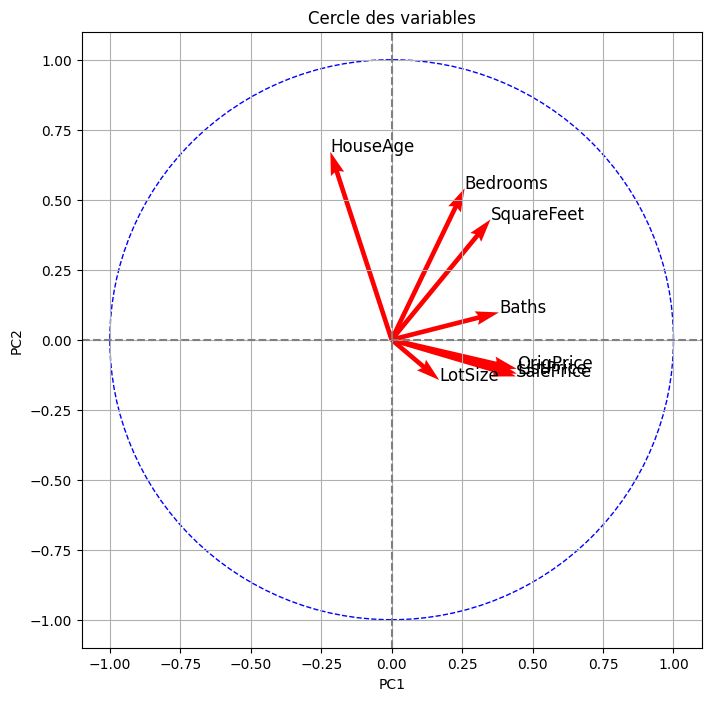

In [51]:
# Cercle des variables
plt.figure(figsize=(8, 8))
plt.quiver(np.zeros(coordinates_variables.shape[0]), np.zeros(coordinates_variables.shape[0]), 
           coordinates_variables['PC1'], coordinates_variables['PC2'], 
           angles='xy', scale_units='xy', scale=1, color='r')

# Ajouter les noms des variables
for i, (x, y) in enumerate(zip(coordinates_variables['PC1'], coordinates_variables['PC2'])):
    plt.text(x, y, coordinates_variables.index[i], fontsize=12)

# Ajouter un cercle
circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b', linestyle='--')
plt.gca().add_artist(circle)

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle des variables')
plt.grid()
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.show()

In [52]:
# Calculer les carrés des coordonnées (étape 1)
squared_coordinates = coordinates_variables**2

# Calculer la somme des carrés des coordonnées pour chaque variable (étape 2)
sum_squared_coordinates = squared_coordinates.sum(axis=1)  # Somme par ligne (chaque variable)

# Calculer la qualité de représentation (cos²) (étape 3)
quality_variables = squared_coordinates.div(sum_squared_coordinates, axis=0)

# Afficher la qualité de représentation des variables
print("Qualité de représentation (cos²) des variables :")
print(quality_variables)


Qualité de représentation (cos²) des variables :
                 PC1       PC2       PC3       PC4       PC5       PC6  \
Bedrooms    0.067006  0.292280  0.023475  0.478716  0.138346  0.000034   
Baths       0.144854  0.009519  0.014139  0.035586  0.659500  0.136317   
SquareFeet  0.123133  0.184556  0.000031  0.124809  0.038527  0.526662   
LotSize     0.028508  0.020691  0.850112  0.082416  0.003629  0.014123   
OrigPrice   0.197041  0.010769  0.000054  0.044025  0.044114  0.022891   
ListPrice   0.197614  0.014587  0.000110  0.036598  0.049555  0.030835   
SalePrice   0.194528  0.017173  0.000322  0.036733  0.063529  0.042577   
HouseAge    0.047315  0.450426  0.111758  0.161119  0.002800  0.226562   

                 PC7       PC8  
Bedrooms    0.000135  0.000008  
Baths       0.000044  0.000042  
SquareFeet  0.002175  0.000108  
LotSize     0.000170  0.000353  
OrigPrice   0.623230  0.057875  
ListPrice   0.027297  0.643404  
SalePrice   0.346932  0.298207  
HouseAge    0.000016

In [53]:
# Calculer la contribution des variables
contribution_variables = coordinates_variables**2

# Normaliser la contribution pour chaque composante principale
contribution_variables_norm = contribution_variables / contribution_variables.sum(axis=0)

# Afficher la contribution des variables
print("Contribution des variables par composante principale :")
print(contribution_variables_norm)

Contribution des variables par composante principale :
                 PC1       PC2       PC3       PC4       PC5       PC6  \
Bedrooms    0.067006  0.292280  0.023475  0.478716  0.138346  0.000034   
Baths       0.144854  0.009519  0.014139  0.035586  0.659500  0.136317   
SquareFeet  0.123133  0.184556  0.000031  0.124809  0.038527  0.526662   
LotSize     0.028508  0.020691  0.850112  0.082416  0.003629  0.014123   
OrigPrice   0.197041  0.010769  0.000054  0.044025  0.044114  0.022891   
ListPrice   0.197614  0.014587  0.000110  0.036598  0.049555  0.030835   
SalePrice   0.194528  0.017173  0.000322  0.036733  0.063529  0.042577   
HouseAge    0.047315  0.450426  0.111758  0.161119  0.002800  0.226562   

                 PC7       PC8  
Bedrooms    0.000135  0.000008  
Baths       0.000044  0.000042  
SquareFeet  0.002175  0.000108  
LotSize     0.000170  0.000353  
OrigPrice   0.623230  0.057875  
ListPrice   0.027297  0.643404  
SalePrice   0.346932  0.298207  
HouseAge    0.

In [54]:
# Filtrer les individus ayant une contribution supérieure au seuil dans PC3
high_contribution_individuals_pc1 = contribution_df[contribution_df['PC3'] > threshold]

print("Individus avec une forte contribution dans PC1 (contribution > seuil) :")
print(high_contribution_individuals_pc1)


Individus avec une forte contribution dans PC1 (contribution > seuil) :
          PC1       PC2       PC3     PC4       PC5       PC6       PC7  \
928  0.070957  0.009326  0.422981  0.0325  0.007968  0.000192  0.000195   

          PC8  
928  0.001896  
